# Module 1 - Comparing Search Algorithm Performance  

## Binary Search  
Binary search is one of the simplest algorithms. It is designed to find a value within a sorted list by cutting the list in half at every iteration until the value has been found. It has a Big O runtime of $O(\log_2{N})$. This means that the worst case number of operations needed to find a value grows at a logarithmic rate. This is compared to a simple search that checks every item in the list until it finds the desired value. It has a Big O runtime of $O(N)$. The simple search operations grow linearly with the amount of items being searched.  

Let's start off by building each algorithm, and then we'll compare search times and plot their runtimes.

## Imports

In [37]:
import functools
from math import floor
import time
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [26]:
class TimeFunc:
    """Decorator to return run time of function in seconds."""
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.func_time = 0
        
    def __call__(self, *args, **kwargs):
        start_time = time.perf_counter()
        result = self.func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        self.func_time = run_time
        return result

## 1 & 2 - Generate Random Arrays (Sorted)

In [44]:
@TimeFunc
def new_array(length: int) -> np.array:
    """Return sorted numpy array.
    
    Parameters
    ----------
    length: int
        The length of the generated array.
        
    Returns
    -------
    np.array
        Sorted numpy array.
    """
    return np.sort(np.random.randint(1, 10001, length), kind="mergesort")


a1 = new_array(length=512)
a1_sort = new_array.func_time

a2 = new_array(length=1024)
a2_sort = new_array.func_time

a3 = new_array(length=2048)
a3_sort = new_array.func_time

a4 = new_array(length=4096)
a4_sort = new_array.func_time

a5 = new_array(length=8192)
a5_sort = new_array.func_time

## 3 - Execute Binary Search for Each Array

### Function Creation  
Below I've annotated the binary search function quite a bit to keep track of what's going on. The sorted list is cut in half, and the halfway point is guessed. If the guess is higher than the actual value, the new high value is changed to one less than the mid-point. If the guess is lower, the new low is set to one greater than the mid. This continues until the value is found.  Each iteration halves the list.  

The simple search algorithms iterates through the list until it finds the value. While this is efficient in small lists, as we'll see in the next section, it slows down considerably as the list grows. This is where the binary search algorithm shines.

In [31]:
@TimeFunc
def binary_search(sorted_array: np.array, item: int) -> Tuple[int, int]:
    """Perform Binary search on sorted array.
    
    Parameters
    ----------
    sorted_array: np.array
        Sorted numpy array to be searched.
    item: int
        The value to search for in the array.
        
    Returns
    -------
    Tuple[int, int]
        First value is the target item.
        Second value is the number of steps to get
        the target item.
    """
    low: int = 0
    high: int = len(sorted_array) - 1
    steps: int = 0
    while low <= high:
        # Cut the list in half
        mid: int = floor((low + high) / 2)
        # Guess the midway point
        guess: int = sorted_array[mid]
        if guess == item:
            steps += 1
            return mid, steps
        # If midway point is higher, make
        # new high one less than mid-point
        elif guess > item:
            steps += 1
            high = mid - 1
        # If midway point lower, make
        # new high one higher than mid-point
        else:
            steps += 1
            low = mid + 1
    return None, None


@TimeFunc
def simple_search(sorted_array: np.array, item: int) -> Tuple[int, int]:
    """Perform a simple search on an array.
    
    Parameters
    ----------
    sorted_array: np.array
        Sorted numpy array to be searched.
    item: int
        The value to search for in the array.
        
    Returns
    -------
    Tuple[int, int]
        First value is the target item.
        Second value is the number of steps to get
        the target item.
    """
    start = 0
    steps = 0
    while sorted_array[start] <= item:
        guess = sorted_array[start]
        if guess == item:
            steps += 1
            return start, steps
        else:
            steps += 1
            start += 1
    return None, None

## 4 - Compare

In [64]:
def create_compare_df() -> pd.DataFrame:
    """Generate comparison dataframe for algorithms.
    
    Returns
    -------
    pd.DataFrame
        Pandas data frame containing time metrics for
        each search and sort algorithm.
    """
    compare: dict = {
        "array_length": [],
        "sort_time": [],
        "linear_time": [],
        "binary_time": [],
        "sort_plus_binary": [],
    }

    sizes: list = [512, 1024, 2048, 4096, 8192]

    for i in sizes:
        compare["array_length"].append(i)
        a = new_array(i)
        compare["sort_time"].append(new_array.func_time)
        b_search = binary_search(a, np.max(a))
        compare["binary_time"].append(binary_search.func_time)
        ss = simple_search(a, np.max(a))
        compare["linear_time"].append(simple_search.func_time)
        compare["sort_plus_binary"].append(
            new_array.func_time + binary_search.func_time
        )

    df: pd.DataFrame = pd.DataFrame(compare)
    df.sort_time = df.sort_time.apply(lambda t: t * 1000)
    df.linear_time = df.linear_time.apply(lambda t: t * 1000)
    df.binary_time = df.binary_time.apply(lambda t: t * 1000)
    df.sort_plus_binary = df.sort_plus_binary.apply(lambda t: t * 1000)

    return df


# Display the dataframe
cdf = create_compare_df()
cdf.head()

,array_length,sort_time,linear_time,binary_time,sort_plus_binary
0,512,0.384198,0.296568,0.013205,0.397403
1,1024,0.132567,0.617546,0.010048,0.142615
2,2048,0.305702,1.297695,0.013629,0.319331
3,4096,0.354252,2.529339,0.012463,0.366715
4,8192,0.614611,5.075358,0.014924,0.629535


## 5 - Plotting Time vs Array Length

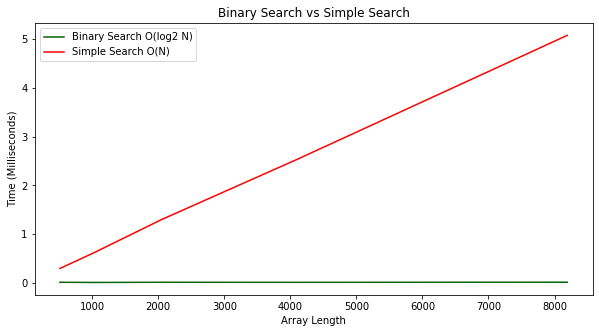

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(cdf.array_length, cdf.binary_time, color="darkgreen")
ax.plot(cdf.array_length, cdf.linear_time, color="red")
ax.set_title("Binary Search vs Simple Search")
ax.set_ylabel("Time (Milliseconds)")
ax.set_xlabel("Array Length")
ax.legend(["Binary Search O(log2 N)", "Simple Search O(N)"])

plt.show()

The disparity between these two algorithms is quite apparent when they are visualized on the same scale. The binary search algorithm immediately outperforms the simple search and the gap between the two only widens as the array grows in size.

## 6 - All Times

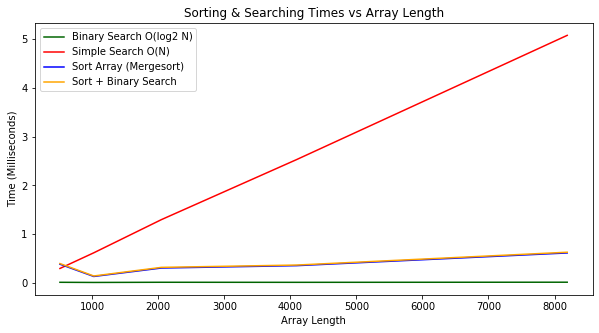

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(cdf.array_length, cdf.binary_time, color="darkgreen")
ax.plot(cdf.array_length, cdf.linear_time, color="red")
ax.plot(cdf.array_length, cdf.sort_time, color="blue")
ax.plot(cdf.array_length, cdf.sort_plus_binary, color="orange")
ax.set_title("Sorting & Searching Times vs Array Length")
ax.set_ylabel("Time (Milliseconds)")
ax.set_xlabel("Array Length")
ax.legend(
    [
        "Binary Search O(log2 N)",
        "Simple Search O(N)",
        "Sort Array (Mergesort)",
        "Sort + Binary Search",
    ]
)

plt.show()

I chose the mergesort algorithm for sorting the randomly generated arrays. We can see that the sorting algorithm makes up the majority of the time when combined with the binary search due to the fact that the binary search has a logarithmic run-time. It's interesting that the mergesort algorithm pivots around the 1000 mark (array size). When plotted on the same scale, it becomes glaringly obvious that the binary search outperforms a simple search on a sorted array.

# Executive Summary

## Binary Search  
Binary search is one of the simplest algorithms. It is designed to find a value within a sorted list by cutting the list in half at every iteration until the value has been found. It has a Big O runtime of $O(\log_2{N})$. This means that the worst case number of operations needed to find a value grows at a logarithmic rate. This is compared to a simple search that checks every item in the list until it finds the desired value. It has a Big O runtime of $O(N)$. The simple search operations grow linearly with the amount of items being searched.  

## Recap  
* Binary search is a lot faster than simple search.  
* $O(\log_2 N)$ is faster than $O(N)$, but it gets a lot faster once the list of items you're searching through grows.  
* Algorithm speed isn't measured in seonds.  
* Algorithm times are measured in terms of growth of an algorithm.  
* Algorithm times are written in Big O notation.  

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.